## The function $Q(x)$

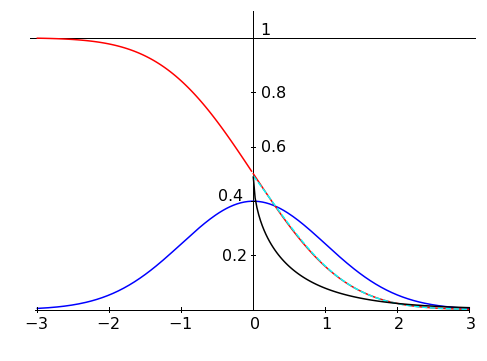

In [2]:
from PyM import *
exp = np.exp

# Important points
O = (0,0); X1 = (1,0); X2 = (2,0); X3 = (3,0);
Y02=(0,0.2); Y04=(0,0.4); Y06=(0,0.6); Y08=(0,0.8); Y10=(0,1.0);

eps = 0.001

t = ls(-3+eps,3,241)
tp = array([x for x in t if x>=0])
tn = array([x for x in t if x<=0])

def gauss(x): return (1/sqrt(2*pi))*exp(-x**2/2)

K = 0.2316419
a0 = 0.31981530; a1 = -0.356563782; a2 = 1.781477937
a3 = -1.821255978; a4 = 1.330274429
def Q(x):
    s = 1/(1+K*x)
    f = a0+a1*s+a2*s**2+a3*s**3+a4*s**4
    return gauss(x)*s*f

# Another approximation of Q(x) valid for x>0. It is worse
# than the previous version, but differs from it in less than 0.01
def Q2(x):
    A = (1-exp(-1.4*x))*exp(-x**2/2)
    B = 1.135*sqrt(2*pi)*x
    return A/B

def P(x): return Q(sqrt(2*x))

def _(X): return (-X[0],X[1])

# plotting
close('all')

eps=0.1

ax = plt.figure("Graph of gauss(x)", figsize=(8,6))
plt.xlim(-eps-3,3+eps)
plt.ylim(-eps,1+eps)
plt.axis('off')

def vtick(x,l=0.01):
    return seg((x,-l),(x,l))
def htick(y,l=0.01):
    return seg((-l,y),(l,y))

ruler(O,X3, left_inc=101, right_inc=0)
ruler(O,Y10, left_inc=0)
ruler((-3,1),(3,1),lw=1)

plot(t,gauss(t),color='blue')
plot(tp,Q(tp),color='red')
plot(tp,Q2(tp),color='cyan',ls='--')
plot(tp,P(tp),color='black')
plot(tn,1-Q(-tn),color='red')

for a in [-3,-2,-1,1,2,3]:
    vtick(a)
for b in [0.2,0.4,0.6,0.8,1.0]:
    htick(b,0.03)

# labeling
lable(X3,'$3$',dx=-0.6*eps,dy=-0.7*eps,fs=16)
lable(X2,'$2$',dx=-0.6*eps,dy=-0.7*eps,fs=16)
lable(X1,'$1$',dx=-0.6*eps,dy=-0.7*eps,fs=16)
lable(O,'$0$',dx=-0.6*eps,dy=-0.7*eps,fs=16)
lable(_(X1),'$-1$',dx=-1.8*eps,dy=-0.7*eps,fs=16)
lable(_(X2),'$-2$',dx=-1.8*eps,dy=-0.7*eps,fs=16)
lable(_(X3),'$-3$',dx=-1.8*eps,dy=-0.7*eps,fs=16)
lable(Y02,'$0.2$',dx=-4.5*eps,dy=-0.2*eps,fs=16)
lable(Y04,'$0.4$',dx=-5*eps,dy=-0.0*eps,fs=16)
lable(Y06,'$0.6$',dx=eps,dy=-0.2*eps,fs=16)
lable(Y08,'$0.8$',dx=eps,dy=-0.2*eps,fs=16)
lable(Y10,'$1$',dx=eps,dy=0.1*eps,fs=16)
plt.show()